Project Assignment #1
In this project assignment, we are going to use the "Traffic Tickets Issued: Four Year Window" data set available from the Data.Gov website (https://catalog.data.gov/dataset?groups=local&organization_type=State+Government#topic=local_navigation).

The focus of the analysis will be oriented towards the following attributes within the cities of :

1) Violation Year

2) Violation Month

3) Violation Day of Week

4) Age at Violation

5) Gender

There are a few objectives you need to accomplish:

1) Examine the above-mentioned attributes in the data set for any missing values

2) If there are any missing values, treat the misisng values. Here is a article that provides insight into the common methods to deal with missing values:

https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce

Please the tips provided in the article to deal with missing values

3) Compute summary statistics for the "age at violation" for Males and Females respectively

a) Mean, b) Median, c) Standard Deviation, d) Variance

4) Construct a Boxplot to surface the 25%, 50% and 75% percentiles of "Age at Violation" by Gender

5) Construct Histograms to showcase the following:

a) Count of Violations by Day of Week

b) Count of Violations by Month

c) Count of Violations by Gender

6) Hone in on the data set for the Year 2015. Does the 'Violation at Age' and the 'Total # Of Violations' vary together? Construct a scatter plot that plots the 'Violation at Age' v/s the Total # Of Violation'. Does the Scatter Plot point to a positive covariance? Now, compute the Covariance. Perform this analysis for both the genders.

7) Compute the Correlation Coefficient between the 2 variable i.e. 'Violation at Age' and the 'Total # Of Violations'. Perform this analysis for both the genders.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Treat **Data**

In [0]:
data = pd.read_csv('https://data.ny.gov/api/views/q4hy-kbtf/rows.csv')

In [6]:
data.head()

,Violation Charged Code,Violation Description,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License,Police Agency,Court,Source
0,5091G,UNLICENSED GT 60DAYS,2015,1,THURSDAY,55.0,M,NEW YORK,NYC POLICE DEPT,QUEENS SOUTH TVB,TVB
1,376,LIGHTING-VARIOUS VIO,2015,1,THURSDAY,24.0,M,NEW YORK,NYC POLICE DEPT,QUEENS SOUTH TVB,TVB
2,1160C,IMPROPER LEFT TURN ON ONE-WAY RDWY,2015,2,MONDAY,62.0,M,NEW YORK,NYC POLICE DEPT,MANHATTAN SOUTH TVB,TVB
3,5091G,UNLICENSED GT 60DAYS,2015,9,THURSDAY,33.0,F,MICHIGAN,TRIBOROUGH BRIDGE TUNNEL AUTH,QUEENS SOUTH TVB,TVB
4,5091G,UNLICENSED GT 60DAYS,2015,5,SATURDAY,45.0,M,UNKNOWN,NYC POLICE DEPT,BROOKLYN SOUTH TVB,TVB


In [7]:
data = data[['Violation Year', 'Violation Month', 'Violation Day of Week', 'Age at Violation', 'Gender']]
data.head()

,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender
0,2015,1,THURSDAY,55.0,M
1,2015,1,THURSDAY,24.0,M
2,2015,2,MONDAY,62.0,M
3,2015,9,THURSDAY,33.0,F
4,2015,5,SATURDAY,45.0,M


In [9]:
data.isnull().any()

Violation Year           False
Violation Month          False
Violation Day of Week    False
Age at Violation          True
Gender                   False
dtype: bool

In [13]:
data = data.fillna(data['Age at Violation'].mode())
data.isnull().any().any()

False

## Summary Statistics

In [0]:
males = data[data['Gender']=='M']
males_summary = males.describe()
males_summary = males_summary.loc[['mean', '50%', 'std']]

In [0]:
males_variance = np.power(males_summary.loc[['50%']], 2)
males_summary = males_summary.append(males_variance, ignore_index=True)

In [64]:
males_summary = males_summary.rename({0: 'mean', 1: 'median', 2: 'std', 3: 'variance'})
males_summary

,Violation Year,Violation Month,Age at Violation
mean,2.014492e+03,6.346118,37.028860
median,2.014000e+03,6.000000,34.000000
std,1.120125e+00,3.362163,13.849333
variance,4.056196e+06,36.000000,1156.000000


In [65]:
females = data[data['Gender']=='F']
females_summary = females.describe()
females_summary = females_summary.loc[['mean', '50%', 'std']]
females_variance = np.power(females_summary.loc[['50%']], 2)
females_summary = females_summary.append(females_variance, ignore_index=True)
females_summary = females_summary.rename({0: 'mean', 1: 'median', 2: 'std', 3: 'variance'})
females_summary

,Violation Year,Violation Month,Age at Violation
mean,2.014499e+03,6.366151,36.272119
median,2.014000e+03,6.000000,33.000000
std,1.120372e+00,3.377081,13.512607
variance,4.056196e+06,36.000000,1089.000000


## Plots

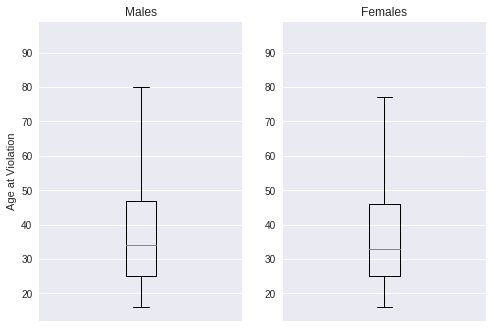

In [80]:
fig, axs = plt.subplots(1, 2)

axs[0].boxplot(males['Age at Violation'])
axs[0].set(title='Males', ylabel='Age at Violation')
axs[0].xaxis.set_visible(False)


axs[1].boxplot(females['Age at Violation'])
axs[1].set(title='Females')
axs[1].xaxis.set_visible(False);

In [3]:
males

NameError: ignored

## Covariance and Correlation Analysis